In [1]:
import pandas as pd
import os
#loads the data
data = pd.read_csv(os.getcwd()+'/fake_job_postings.csv')

In [2]:
#Panda's basic describe method
data.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


Pandas' describe was not that useful here as most of the columns in the dataset contain strings. This only shows 5 columns(really 3 as "job_id" is not much of a feature and "fraudulent" is the label) out of the 18 columns in the data. The three features that are shown here are binary, so describe is not particularly useful

In [3]:
#This loops through every column and checks how many missing values there are in each
for col in data:
    print(col)
    print(sum(data[col].isnull())/len(data))

job_id
0.0
title
0.0
location
0.01935123042505593
department
0.6458053691275167
salary_range
0.8395973154362416
company_profile
0.18501118568232663
description
5.592841163310962e-05
requirements
0.15072706935123042
benefits
0.40324384787472034
telecommuting
0.0
has_company_logo
0.0
has_questions
0.0
employment_type
0.1941275167785235
required_experience
0.39429530201342283
required_education
0.4532997762863535
industry
0.27421700223713646
function
0.3610178970917226
fraudulent
0.0


The above shows the proportion of missing values in each column. It appears most of the columns have a sizable amount of missing data. I would suspect that the job description is an important feature, luckily there is only one data point missing a description. Unfortunately, that data point is one of the very few fraudulent cases. Certain columns like salary range (missing 84%) and department (missing 64%) are missing in a majority of the data points. However, the prescence of salary or department information alone might be a useful binary feature, so either missing data can be given its own designation when these columns are converted to numerical data, or a new feature could be generated that states if the data is missing or not.

In [4]:
sum(data['fraudulent']==0)/len(data)

0.9515659955257271

In [5]:
sum(data['fraudulent']==1)/len(data)

0.04843400447427293

This shows the spread of the classes. A little over 95% of transactions in the data are legitimate and a little under 5% are fraudulent. This puts us in anomaly detection territory. Undersampling of the legitimate class or oversampling on the fraudulent class might work, though I would not expect amazing performance from that approach.

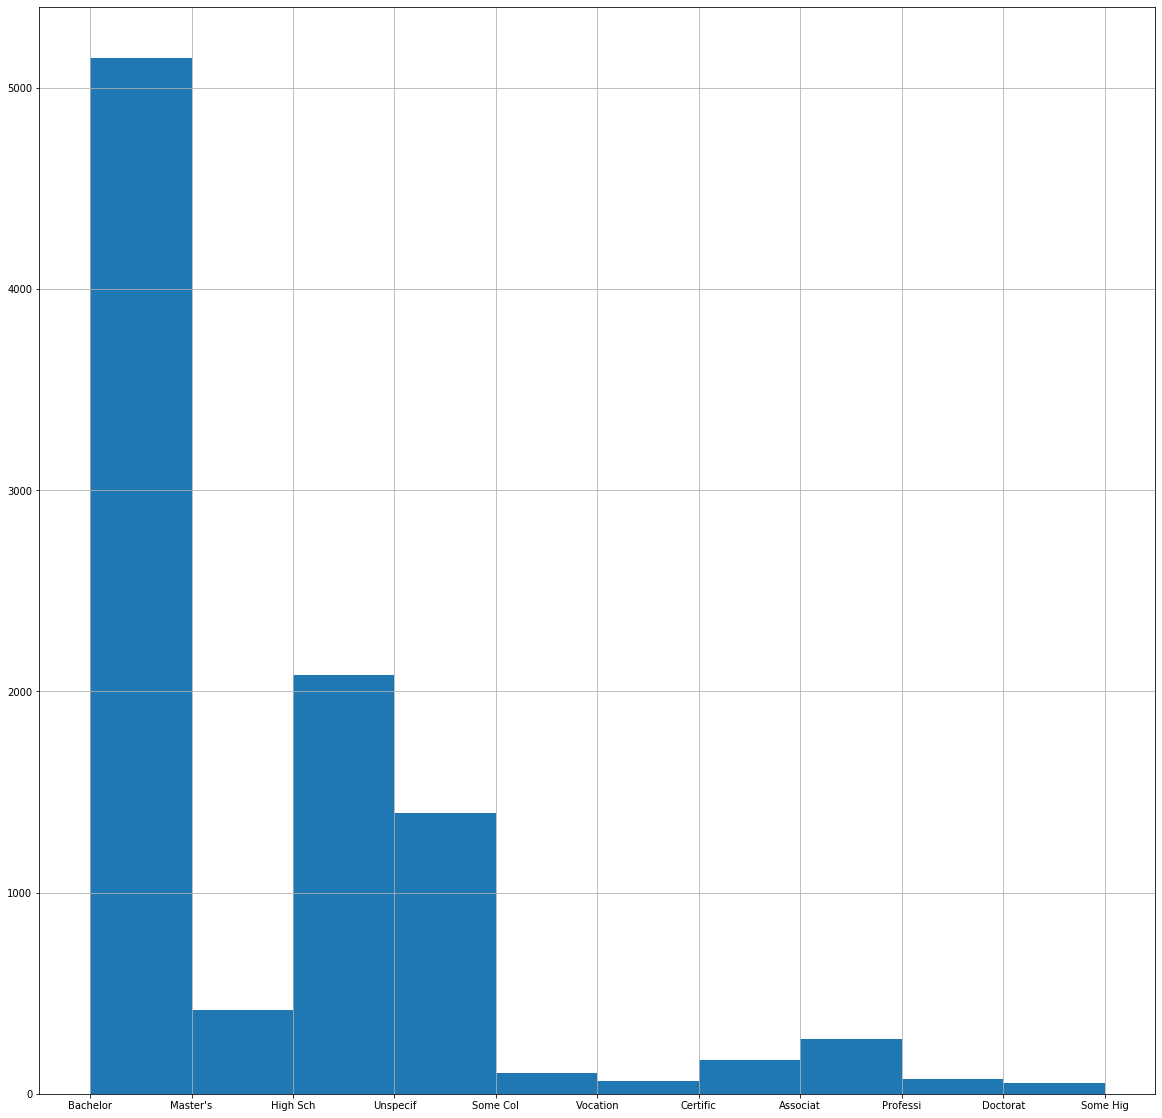

In [6]:
#I map the strings to shorter strings so that the x-axis is readable
#then plot a histogram
data.required_education.map(lambda x: x[0:8],na_action='ignore').hist(figsize=(20,20))

In [7]:
data[data['description'].isnull()]

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
17513,17514,Office Manager,"PL, MZ, Warsaw",NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,1


Using a correlation matrix on data like this can be difficult as most of the data is in strings. Features can be converted to integer representations, though the prescence of correlations can depend upon the way that features are converted over. When converting certain features like education or experience level, the different entries can be ordered in a sensible way. eg give a high school diploma label 0, a bachelor's degree label 1, a masters label 2, a PhD label 3, etc. Other columns have no sensible ordering (like which department a job is under in the hiring organization). Likewise, correlations with more complex language data, like the descriptions, will depend on the vectorization of the data.

# Vectorization of String Data  
## Vectorizing Location
  
First, I will convert the columns with not too many unique entries into integer representations. Attempting to turn the entire column (which can be quite vague or specific) into a new integer column could be hard and lead to very sparse data, so I am just looking at the two digit country code at the start.

In [8]:
data['location'].map(lambda x:x[0:2],na_action='ignore').value_counts().index

Index(['US', 'GB', 'GR', 'CA', 'DE', 'NZ', 'IN', 'AU', 'PH', 'NL', 'BE', 'IE',
       'SG', 'HK', 'PL', 'EE', 'IL', 'FR', 'ES', 'AE', 'EG', 'SE', 'RO', 'DK',
       'ZA', 'BR', 'IT', 'FI', 'PK', 'LT', 'MY', 'QA', 'JP', 'RU', 'MX', 'PT',
       'TR', 'BG', 'SA', 'CH', 'CN', 'AT', 'MU', 'HU', 'MT', 'UA', 'ID', 'CY',
       'NG', 'TH', 'KR', 'IQ', 'PA', 'BY', 'AR', 'LU', 'BH', 'NO', 'KE', 'RS',
       'CZ', 'LV', 'TT', 'TW', 'VN', 'NI', 'VI', 'BD', 'IS', 'CL', 'KW', 'TN',
       'ZM', 'LK', 'SK', 'AM', 'CM', 'UG', 'AL', 'SV', 'JM', 'CO', 'GH', 'MA',
       'KH', 'PE', 'SI', 'KZ', 'HR', 'SD'],
      dtype='object')

In [9]:
#This shows how many entries belong to each country.
for i in data['location'].map(lambda x:x[0:2],na_action='ignore').value_counts():
    print(i)

10656
2384
940
457
383
333
276
214
132
127
117
114
80
77
76
72
72
70
66
54
52
49
46
42
40
36
31
29
27
23
21
21
20
20
18
18
17
17
15
15
15
14
14
14
13
13
13
11
10
10
10
10
9
9
9
9
9
8
7
7
6
6
4
4
4
4
3
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1


Most countries that appear in the data are quite underrepresented, so I will take countries with at least 100 entries (of which there are 12) and assign them a unique value, every other entry will be given the same value to represent "other."

In [10]:
#I create a new dataframe, data_vec to house the vectorized data
data_vec = pd.DataFrame()
#First I create the vocabulary
assigner = {}
loop_index = 0
for i in data['location'].map(lambda x:x[0:2],na_action='ignore').value_counts().index:
    if (loop_index<12):
        assigner[i] = loop_index
        loop_index +=1
    else:
        assigner[i] = loop_index
#This is to assign na's class 13, which will be done later on 
assigner['na'] = 13

In [11]:
#This uses the map function to assign entries their class
data_vec['location'] = data['location'].map(lambda x: assigner[str(x)[0:2]])


## Vectorizing Department

In [12]:
#for i in data['department'].value_counts().index:
#    print(i)
data['department'].value_counts()

Sales             551
Engineering       487
Marketing         401
Operations        270
IT                225
                 ... 
Área Comercial      1
KHR                 1
Social Media        1
Options Away        1
Sales Intern        1
Name: department, Length: 1337, dtype: int64

In [13]:
#The first 7 will get their own unique department, the rest will be filtered to "other" or
#"none"
deps = data['department'].map(lambda x: x.lower(),na_action='ignore').value_counts()
loop_index = 0
deps_dict = {}
for i in deps.index:
    if loop_index<8:
        deps_dict[i] = loop_index
        loop_index += 1
    else:
        deps_dict[i] = loop_index
        
deps_dict['nan'] = 9

In [14]:
deps = data['department'].map(lambda x: deps_dict[str(x).lower()])
data_vec['department'] = deps

In [15]:
data

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


## Vectorizing salary range
  
Note: I am just going to make it a binary variable of missing or not since 83% don't include a salary range and of the salary ranges included, none appear more than about 100 times.

In [16]:
data['salary_range'].isnull()
sal = []
for i in data['salary_range'].isnull():
    if (i == True):
        sal.append(1)
    else:
        sal.append(0)

In [17]:
data_vec['salary_included'] = sal

## Vectorizing  employment type
  
Note: I skipped company profile, description, requirements, benefits because those are more "free form" fields. They cannot be converted to simple integers as most entries are unique. They will be handled later.